In [19]:
import pandas as pd
import os
import seaborn as sns
import numpy as np

In [51]:
def nucleotideToDigit(seq):
    digit_seq = []
    seq = list(seq)
    for n in seq:
        if n == 'T' :
            d = -1.5
        elif n =='C' : 
            d = 0.5
        elif n == 'A' :
            d = 1.5
        elif n == 'G' :
            d = -0.5
        else:
            d = 0
        digit_seq.append(d)
    
    return np.array(digit_seq)
     
nucleotideToDigit('ACTGN')

array([ 1.5,  0.5, -1.5, -0.5,  0. ])

In [52]:
df_training = pd.read_csv('data/covid/training.csv')
df_training.head()

,PID,CLASS,CLASSNAME,SEQ
0,AB257344 |SARS coronavirus Frankfurt 1 genomic...,1,SARS-COV-1,GATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTA...
1,AH013708 |SARS coronavirus Sin0409| partial se...,1,SARS-COV-1,CATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCA...
2,AH013709 |SARS coronavirus Sin_WNV| partial se...,1,SARS-COV-1,CACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTA...
3,AP006557 |SARS coronavirus TWH genomic RNA| co...,1,SARS-COV-1,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...
4,AP006558 |SARS coronavirus TWJ genomic RNA| co...,1,SARS-COV-1,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...


In [53]:
df_training['DIG_SEQ'] = df_training['SEQ'].apply(lambda x: nucleotideToDigit(x))
df_training.head()

,PID,CLASS,CLASSNAME,SEQ,DIG_SEQ
0,AB257344 |SARS coronavirus Frankfurt 1 genomic...,1,SARS-COV-1,GATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTA...,"[-0.5, 1.5, -1.5, 0.5, -1.5, 0.5, -1.5, -1.5, ..."
1,AH013708 |SARS coronavirus Sin0409| partial se...,1,SARS-COV-1,CATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCA...,"[0.5, 1.5, -1.5, -1.5, 0.5, 1.5, -0.5, -1.5, 1..."
2,AH013709 |SARS coronavirus Sin_WNV| partial se...,1,SARS-COV-1,CACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTA...,"[0.5, 1.5, 0.5, -0.5, 0.5, -0.5, 0.5, -0.5, -0..."
3,AP006557 |SARS coronavirus TWH genomic RNA| co...,1,SARS-COV-1,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,"[1.5, -1.5, 1.5, -1.5, -1.5, 1.5, -0.5, -0.5, ..."
4,AP006558 |SARS coronavirus TWJ genomic RNA| co...,1,SARS-COV-1,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,"[1.5, -1.5, 1.5, -1.5, -1.5, 1.5, -0.5, -0.5, ..."


In [58]:
len(df_training.iloc[1]['SEQ']), len(df_training.iloc[1]['DIG_SEQ']), df_training.iloc[1]['PID']

(25665, 25665, 'AH013708 |SARS coronavirus Sin0409| partial sequence')

In [61]:
print('Average length of the seqeunces: ', int(np.mean(df_training['DIG_SEQ'].str.len())))

Average length of the seqeunces:  20151


In [59]:
df_training.to_csv('TrainSet_numeric.csv', index=False)

In [20]:
df_list = []
test_size = 0

for t in os.listdir('data/covid/test'):
    df = pd.read_csv('data/covid/test/'+t)
    print(t , ' read', ', length: ', len(df))
    print(df.columns)
    test_size += len(df)
    df_list.append(df)
print('Test data size: ', test_size)

test_(2).csv  read , length:  1090
Index(['PID', 'CLASS', 'SEQ'], dtype='object')
test_(3).csv  read , length:  4000
Index(['PID', 'CLASS', 'SEQ'], dtype='object')
test_(5).csv  read , length:  5010
Index(['PID', 'CLASS', 'SEQ'], dtype='object')
test_(4).csv  read , length:  3500
Index(['PID', 'CLASS', 'SEQ'], dtype='object')
test_(1).csv  read , length:  3143
Index(['PID', 'CLASS', 'SEQ'], dtype='object')
Test data size:  16743


In [21]:
merged_test_dfs = pd.concat(df_list)

In [22]:
merged_test_dfs.head(1)

,PID,CLASS,SEQ
0,JF292909 |SARS coronavirus MA15 isolate d2ym4|...,1,CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT...


In [23]:
all_data = pd.concat([merged_test_dfs, df_training])
len(all_data)

18243

In [24]:
columns = ['PID', 'CLASS', 'SEQ']
all_data_final = all_data[columns]
print(all_data_final.columns)
all_data_final.head()

Index(['PID', 'CLASS', 'SEQ'], dtype='object')


,PID,CLASS,SEQ
0,JF292909 |SARS coronavirus MA15 isolate d2ym4|...,1,CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT...
1,JF292910 |SARS coronavirus MA15 isolate d2ym5|...,1,CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT...
2,JF292911 |SARS coronavirus MA15 isolate d4ym1|...,1,CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT...
3,JF292912 |SARS coronavirus MA15 isolate d4ym2|...,1,CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT...
4,JF292913 |SARS coronavirus MA15 isolate d4ym3|...,1,CGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGT...


In [25]:
all_data_final.dropna()
len(all_data_final)

18243

In [26]:
all_data_final['CLASS'].apply(lambda x: int(x))
all_data_final['SEQ'].apply(lambda x: str.upper(x))
all_data_final.reset_index(inplace=True)

In [27]:
# all_data_final.to_csv('all_data.csv', index=False)

In [28]:
print('Average length of the seqeunces: ', int(np.mean(all_data_final['SEQ'].str.len())))

Average length of the seqeunces:  24861


<AxesSubplot:xlabel='CLASS', ylabel='count'>

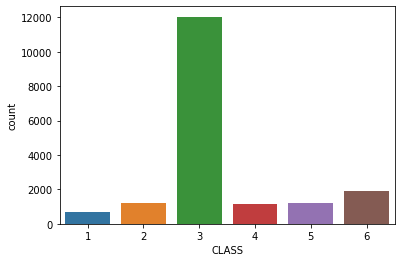

In [29]:
sns.countplot(data= all_data_final, x = 'CLASS')

array([ 1.5,  0.5, -1.5, -0.5,  0. ])

,PID,CLASS,CLASSNAME,SEQ,DIG_SEQ
0,AB257344 |SARS coronavirus Frankfurt 1 genomic...,1,SARS-COV-1,GATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTA...,"[-0.5, 1.5, -1.5, 0.5, -1.5, 0.5, -1.5, -1.5, ..."
1,AH013708 |SARS coronavirus Sin0409| partial se...,1,SARS-COV-1,CATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCA...,"[0.5, 1.5, -1.5, -1.5, 0.5, 1.5, -0.5, -1.5, 1..."
2,AH013709 |SARS coronavirus Sin_WNV| partial se...,1,SARS-COV-1,CACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTA...,"[0.5, 1.5, 0.5, -0.5, 0.5, -0.5, 0.5, -0.5, -0..."
3,AP006557 |SARS coronavirus TWH genomic RNA| co...,1,SARS-COV-1,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,"[1.5, -1.5, 1.5, -1.5, -1.5, 1.5, -0.5, -0.5, ..."
4,AP006558 |SARS coronavirus TWJ genomic RNA| co...,1,SARS-COV-1,ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCT...,"[1.5, -1.5, 1.5, -1.5, -1.5, 1.5, -0.5, -0.5, ..."


In [ ]:
all_data_final

In [46]:
# i = 0
# for row in all_data_final.iterrows():
#     all_data_final['SEQ'][i] = nucleotideToDigit(row[1][3])
#     i+=1

/tmp/ipykernel_272407/3469598069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_final['DIG_SEQ'][i] = nucleotideToDigit(row[1][3])


ValueError: setting an array element with a sequence.

In [36]:
nucleotideToDigit(all_data_final['SEQ'][0])

array([ 0.5, -0.5,  1.5, ...,  1.5, -0.5, -1.5])